# Part 1

In [10]:
from sklearn import tree
from matplotlib import pyplot as plt # for a good visualization of the trees 

In [5]:
# X is the training set 
# Each example in X has 4 binary features
X = [[0, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0]]

# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [1, 1, 0, 0, 1, 1]


In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

clf.predict([[1,1,1,1] , [0,1,0,0] , [1,1,0,1], [1,1,1,1],[0,0,0,0] ])


array([1, 1, 0, 1, 1])

On à d'abord entrainé l'arbre de prédiction avec un training set d'input X et d'Output Y.
On lui donne ensuite des nouvelles données en input et on a peut ainsi prédire l'ouput grâce à l'arbre de décision.


# Part 2

In [8]:
text_representation = tree.export_text(clf)
print(text_representation)


|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 1



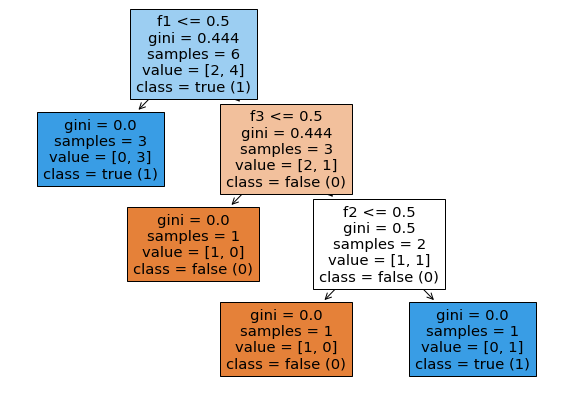

In [134]:
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= ("f1","f2" , "f3", "f4"),
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)


[1]


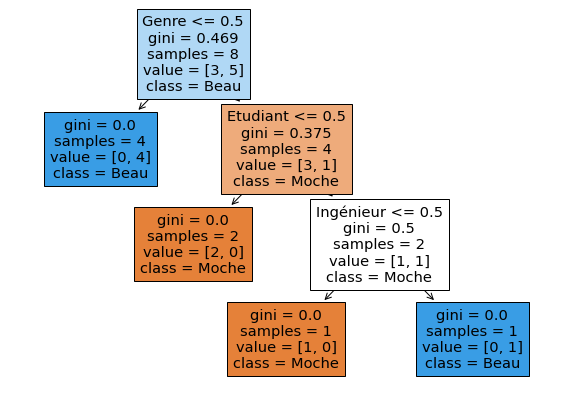

In [135]:
X2 = [[0, 0, 1, 0,0,0], [0, 1, 0, 1,1,0] , [1, 1, 0, 0,1,0] , [1, 0, 1, 1,0,1] , [0, 0, 0, 1,1,0] , [1, 1, 1, 0,1,1],[1, 1, 1, 1,1,0] , [0, 0, 0, 0,0,1]]
Y2 = [1, 1, 0, 0, 1, 1,0,1]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X2, Y2)

print(clf.predict([[0,1,0,0,0,1]]))

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= ("Genre","Aime floppa" ,"Aime bingus","français","Ingénieur","Etudiant"),
                   class_names= ("Moche", "Beau" ), 
                   filled=True)

La visualisation de la construction de l'arbre binaire nous montre que le programme va utiliser seulement quelques critères parmi ceux que l'on a donné. Pour chaque critère, le voisin de gauche correspond au résultat faux du critère, et celui de droite au résultat vrai. L'arbre va essayer de trouver des critères qui permettent de bien diviser les données, et à partir de ces critères et des nouvelles données en entrées, il va prédire la sortie.

gini représente la disparité dans un ensemble
En effet si l'emsemble est parfaitement équilibré on à gini=0 et 0.5 si complétement aléatoire

samples représente le nombre total d'input correspondant à la donnée analysé

# Part 3

### What are the features ?

2 year recidivism, number of priors, score factor, Age > 45, Age < 25, Races (African,Asian,Native American...), Gender, Misdemeanor

### How many examples in the dataset ?

Il y a 6172 exemples

### What are your expectations regarding the most important features ?

On suppose que le plus important sera le nombre d'antécédent ou les 2 ans de récidives

### Propose (informally) a way to reduce the dataset : 

On peut réduire le dataset en retirant les datas doublon

### There many ways to binarize the dataset. How do you propose to do so?

Le seul critère qui n'est pas binaire est le nombre d'antécédent, on peut le binariser en décidant d'un seuil. On aurait ainsi Number of Prior > X qui serait binaire. On peut par exemple prendre X = 3.

In [244]:
import csv
import numpy as np
from utils import load_from_csv
from sklearn.model_selection import train_test_split

train_examples, train_labels, features, prediction = load_from_csv("compass.csv")
unik = np.unique(train_examples,axis=0)
print(f'Number of features = {len(features)}')
print(f'Number of training exammples : {len(train_examples)}')
print(prediction)
print(f'Number of unique examples elements : {len(unik)}')

Number of features = 165
Number of training exammples : 5273
two_year_recid
Number of unique examples elements : 351


On a essayé de clean le dataset en enlevant les redondances.
On passe ainsi de 5273 datas à 351 ce qui parait beaucoup. 
Cependant cela peut être dû au fait qu'il y'a peut de critères importants.
Il y a en effet 165 critères différents mais beaucoup n'ont pas de réel interêt.

In [294]:
X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.8, shuffle=True)

clf1 = tree.DecisionTreeClassifier(splitter='best',max_depth=None,min_samples_leaf=2)
clf2 = tree.DecisionTreeClassifier(splitter='random',max_depth=3,min_samples_leaf=2)
clf3 = tree.DecisionTreeClassifier(splitter='best',max_depth=3,min_samples_leaf=2)
clf4 = tree.DecisionTreeClassifier(splitter='best',max_depth=3,min_samples_leaf=7)

clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)
clf4.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=7)

**max_depth** : permet d'assigner la taille maximum de l'arbre.    
**min_sample_leaf** : permet de choisir le nombre minimum de samples nécessaires correspondant à un critère pour que l'arbre crée un noeud l'utilisant.    
**splitter** : permet de choisir la stratégie utilisée pour choisir le meilleur split. Par défaut on utilise la "meilleure méthode" à savoir l'utilisation de l'entropie.


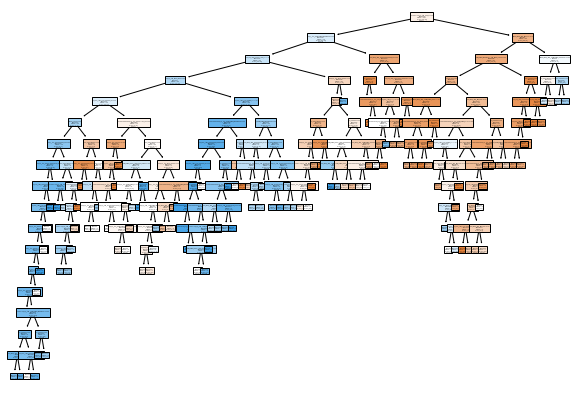

In [278]:
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf1, 
                   feature_names= features,
                   class_names= prediction, 
                   filled=True)

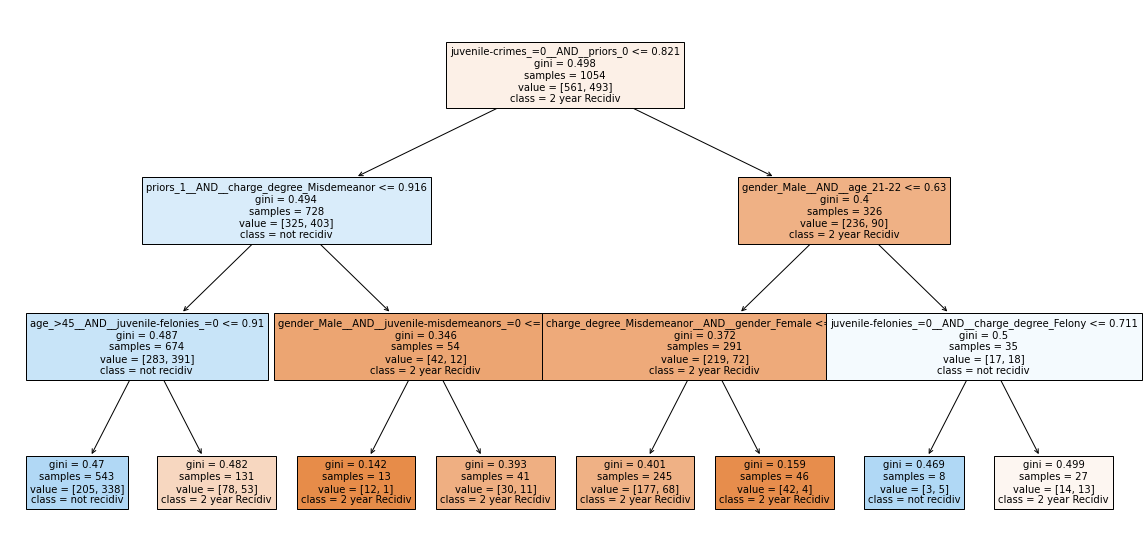

In [279]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(clf2, 
                   feature_names= features,
                   class_names= ("2 year Recidiv","not recidiv"), 
                   filled=True,
                  fontsize=10)

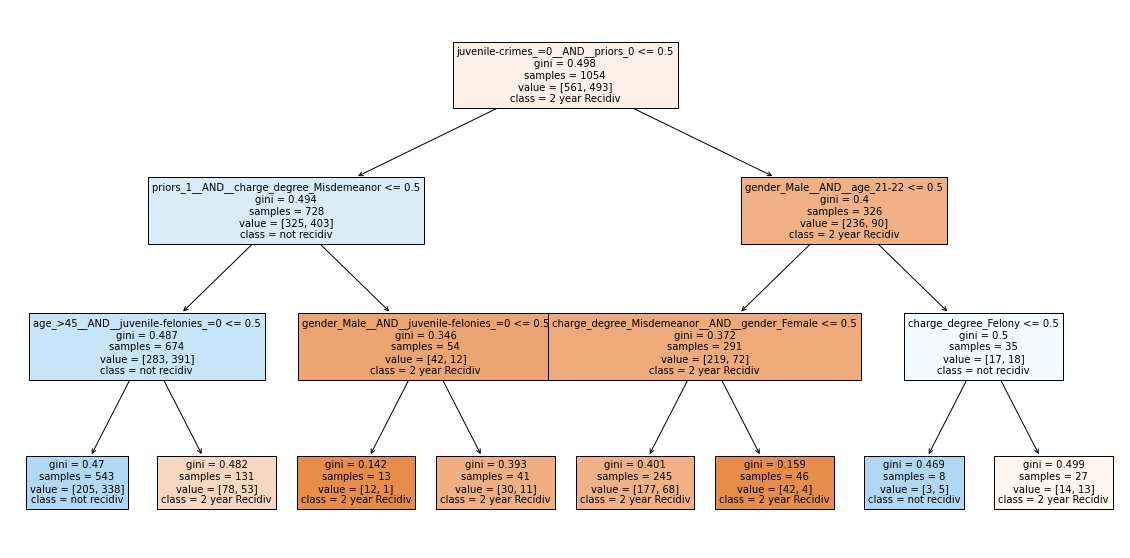

In [280]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(clf3, 
                   feature_names= features,
                   class_names= ("2 year Recidiv","not recidiv"), 
                   filled=True,
                  fontsize=10)

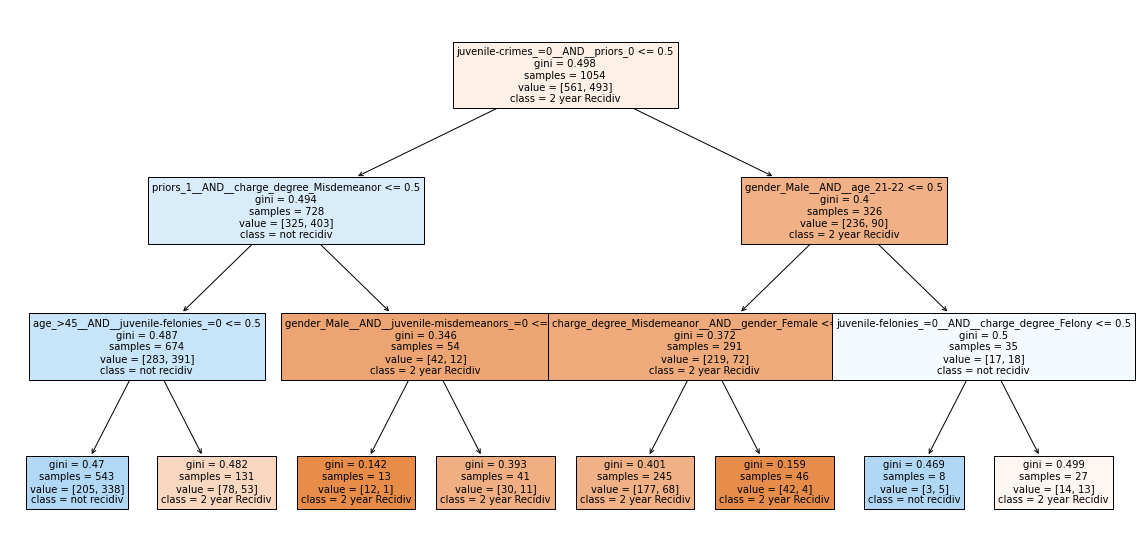

In [281]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(clf4, 
                   feature_names= features,
                   class_names= ("2 year Recidiv","not recidiv"), 
                   filled=True,
                  fontsize=10)

On remarque que la randomisation du split des datas à un grand impact sur les critères utilisés.
Ca a aussi l'air d'être le cas pour le min_sample_leaf, on remarque qu'en changeant ce paramètre on se concentre beaucoup plus sur des critères liés à l'âge.


In [333]:
from sklearn.metrics import accuracy_score,confusion_matrix

times=5
s=np.array([0.,0.,0.,0.])
for i in range(times):
    X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.8,shuffle=True)
    clf1 = tree.DecisionTreeClassifier(splitter='best',max_depth=None,min_samples_leaf=2)
    clf2 = tree.DecisionTreeClassifier(splitter='random',max_depth=3,min_samples_leaf=2)
    clf3 = tree.DecisionTreeClassifier(splitter='best',max_depth=3,min_samples_leaf=2)
    clf4 = tree.DecisionTreeClassifier(splitter='best',max_depth=3,min_samples_leaf=7)

    clf1.fit(X_train,y_train)
    clf2.fit(X_train,y_train)
    clf3.fit(X_train,y_train)
    clf4.fit(X_train,y_train)

    a1=accuracy_score(clf1.predict(X_test),y_test)
    a2=accuracy_score(clf2.predict(X_test),y_test)
    a3=accuracy_score(clf3.predict(X_test),y_test)
    a4=accuracy_score(clf4.predict(X_test),y_test)
    s+=np.array([a1,a2,a3,a4])
print(f'Accuracy of different trees : {s/times}')

Accuracy of different trees : [0.63323062 0.64005689 0.64005689 0.63948803]


En faisant plusieurs tests on se rend compte que quand l'arbre est trop grand il aura une moins bonne prédiction.
Le meilleur résultat est celui avec le splitter random

In [334]:
s=np.array([0.,0.,0.,0.])
for i in range(times):
    X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.8,stratify=train_labels)
    clf1 = tree.DecisionTreeClassifier(splitter='best',max_depth=None,min_samples_leaf=2)
    clf2 = tree.DecisionTreeClassifier(splitter='random',max_depth=3,min_samples_leaf=2)
    clf3 = tree.DecisionTreeClassifier(splitter='best',max_depth=3,min_samples_leaf=2)
    clf4 = tree.DecisionTreeClassifier(splitter='best',max_depth=3,min_samples_leaf=7)

    clf1.fit(X_train,y_train)
    clf2.fit(X_train,y_train)
    clf3.fit(X_train,y_train)
    clf4.fit(X_train,y_train)

    a1=accuracy_score(clf1.predict(X_test),y_test)
    a2=accuracy_score(clf2.predict(X_test),y_test)
    a3=accuracy_score(clf3.predict(X_test),y_test)
    a4=accuracy_score(clf4.predict(X_test),y_test)
    s+=np.array([a1,a2,a3,a4])
print(f'Accuracy of different trees : {s/times}')

Accuracy of different trees : [0.63531643 0.64053093 0.64053093 0.64105238]


Ici on implémente le 5-cross validation  
Avec le 5-cross validation on constate que le résultat de l'arbre trop grand n'a pas changé mais tous les autres l'ont plus ou moins rejoint.  
On peut imaginer qu'en limitant la taille de l'arbre on a ammené l'arbre à générer des bonnes réponses par coincidence.

In [330]:
confusion_matrix(y_test,clf1.predict(X_test))

array([[1658,  562],
       [ 935, 1064]])

Pour savoir si l'algorithme est équitable ou non vis à vis d'une éthnie on pourrait :
- Faire marcher l'algorithme avec les ethnies en parametre
- Le faire marcher sans mentionner les ethnies
- Faire la différence entre les matrices de confusions des 2 mesures
Si il y'a une grandes différences entre les résultats alors ont peut estimer que l'algorithme n'est pas équitable